<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap 4. 모델 훈련 (pg.157 ~ 203)**
---

## **4.1 선형 회귀**

  - 선형 회귀 모델을 훈련시키는 두 가지 방법
    1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구한다.
    2. 경사 하강법이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다.

  - 선형 회귀 모델의 예측
$$ y = Θ_{0} + Θ_{1}x_{1} + Θ_{2}x_{2} + ... + Θ_{n}x_{n}$$
    - y : 예측값
    - n : 특성의 개수
    - $x_{i}$ : i번째 특성값
    - $Θ_{j}$ : j번째 모델 파라미터

  - 선형 회귀 모델의 예측 (벡터 형태)
$$ y = h_{Θ}(x) = Θ⋅x$$
    - Θ : 특성 가중치를 담은 모델의 파라미터 벡터
    - x : $x_{0}$에서 $x_{n}$까지 담은 샘플의 특성 벡터
    - Θ⋅x : 벡터 Θ와 x의 점곱
    - $h_{Θ}$ : 모델 파라미터 Θ를 사용한 가설 함수

  - 선형 회귀 모델을 훈련시키기 위해서는, RMSE를 최소화하는 Θ를 찾아야 한다.
  
  - 선형 회귀 모델의 MSE 비용 함수
$$MSE(X, h_{θ}) = \frac{1}{m} Σ_{i=1}^{m}(θ^{T}x^{(i)} - y^{(i)})^2$$

### 4.1.1 정규방정식

  - 정규방정식
$$θ = (X^TX)^{-1}X^Ty$$
    - θ : 비용 함수를 최소화하는 θ값
    - y : $y^{(i)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

In [1]:
# 선형처럼 보이는 데이터 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

  - 정규방정식을 사용해 θ를 계산해보자. 넘파이 선형대수 모듈(`np.linalg`)에 있는 `inv()` 함수를 이용해 `역행렬을 계산`하고, `dot()` 메서드를 사용해 `행렬 곱셈을 진행`한다.

In [2]:
X_b = np.c_[np.ones((100, 1)), X]     # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.20498134],
       [2.7112973 ]])

  - 정확한 기대치는 $θ_{0} = 4, θ_{1} = 3$이었으나, 잡음으로 인해 원래 함수의 파라미터를 정확하게 재현하지는 못했다. 그러나 매우 비슷한 값을 갖는다.

  - 이번에는 θ를 이용해 예측을 진행해보자.

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]     # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20498134],
       [9.62757595]])

  - 모델의 예측을 그래프에 나타내보자.

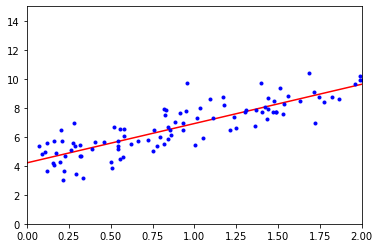

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# 사이킷런에서 선형 회귀를 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([4.20498134]), array([[2.7112973]]))

In [8]:
lin_reg.predict(X_new)

array([[4.20498134],
       [9.62757595]])

  - LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수를 기반으로 하며, 이 함수를 직접 호출할 수 있다.

In [9]:
theta_best_svd, redisuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.20498134],
       [2.7112973 ]])

  - 이 함수는 θ = $X^{+}y$를 계산한다. 여기에서 $X^+$는 X의 유사역행렬이며, np.linalg.pinv() 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.20498134],
       [2.7112973 ]])

  - 유사역행렬은 특잇값 분해(SVD)라고 부르는 표준 행렬 분해 기법을 사용해 계산된다. SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 $UΣV^T$로 분해한다.
  - 유사역행렬은 $X^+ = VΣ^+U^T$로 계산된다. $Σ^+$를 계산하기 위해 알고리즘이 Σ를 먼저 구하고, 그 다음 어떤 낮은 임계값보다 작은 모든 수를 0으로 바꾼다. 그 다음 0이 아닌 모든 값을 역수로 치환한 뒤, 마지막으로 만들어진 행렬을 전치한다.
  - 이는 정규방정식을 계산하는 것보다 훨씬 효율적인 방식이다. m < n이거나 어떤 특성이 중복되어 행렬 $X^TX$의 역행렬이 없다면 정규방정식이 작동하지 않는 데 반해, 유사역행렬은 항상 계산이 가능하다.

### 4.1.2 계산 복잡도

  - 정규방정식은 (n + 1) x (n + 1) 크기가 되는 $X^TX$의 역행렬을 계산한다. 역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이이다.
  - 다시 말해 특성 수가 2배로 늘어나면, 계산 시간이 대략 $2^{2.4} = 5.3$에서 $2^3 = 8$배로 증가한다.
  - 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^2)$이다. 즉, 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다. 

---

## **4.2 경사 하강법**

  - 경사 하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.
    - 기본 아이디어 : 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
    - θ를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시키는 방식
  
  - 경사 하강법에서 중요한 파라미는 스텝의 크기로, `학습률` 하이퍼 파라미터로 결정된다.
    - 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.
    - 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다.

  - 비용 함수가 단순 볼록 함수가 아닐 경우, global minimum이 아닌 local minimum에 도달하게 될 가능성도 있다. 
  
  - 그러나 선형 회귀를 위한 MSE 비용 함수의 경우 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수이므로, 선형 회귀에서 경사 하강법을 이용하면 global minimum에 가깝게 접근할 수 있음이 보장된다. 
  

### 4.2.1 배치 경사 하강법

  - 경사 하강법을 구현하기 위해서는, 각 모델 파라미터 $θ_{j}$에 대해 비용 함수의 그레디언트를 계산해야 하는데, 이를 **편도함수**라고 한다.

  - 비용 함수의 편도함수
$$\frac{∂}{∂θ_{j}}MSE(θ) = \frac{2}{m}Σ_{i=1}^{m}(θ^Tx^{(i)} - y^{(i)})x_{j}^{(i)}$$

  - 비용 함수의 그레디언트 벡터
$$∇_{θ}MSE(θ) = \frac{2}{m}X^T(Xθ - y)$$
    - 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산하기 때문에 해당 알고리즘을 배치 경사 하강법이라고 한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다.
    - 이런 이유로 매우 큰 훈련 세트에서는 아주 느리지만, 특성 수에 민감하지 않기 때문에 수십만 개의 특성에서 선형 회귀를 훈련시키기 위해서는 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

  - 경사 하강법의 스텝
$$θ^{(next step)} = θ - η∇_{θ}MSE(θ)$$

In [11]:
eta = 0.1     # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)     # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [12]:
theta

array([[4.20498134],
       [2.7112973 ]])

  - 정규방정식으로 찾은 값과 정확히 일치한다.

  - 적절한 학습률을 찾기 위해서는 Grid Search를 이용한다. 하지만 Grid Search에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.
  
  - 반복 횟수는 어떻게 지정해야 할까?
    - 너무 작으면 최적점에 도달하기 전 알고리즘이 멈추고, 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다.
    - 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 ϵ보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로, 알고리즘을 중지하는 것이다.

### 4.2.2 확률적 경사 하강법

  - 배치 경사 하강법의 가장 큰 문제점
    - 매 스텝에서 전체 훈련 세트를 이용해 그레디언트를 계산한다는 것
    - 따라서 훈련 세트가 커지면 매우 느려짐

  - 확률적 경사 하강법
    - 기본 아이디어 : 매 스텝에서 한 개의 샘플을 무작위로 선택하고, 그 하나의 샘플에 대한 그레디언트를 계산한다.
    - 매 반복에서 다뤄야 할 데이터가 매우 적으므로, 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠르다.
    - 또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로, 매우 큰 훈련 세트도 훈련시킬 수 있다.

  - 확률적 경사 하강법의 단점
    - 확률적이므로, 이 알고리즘은 배치 경사 하강법에 비해 훨씬 불안정
    - 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하는 것이 아니라, 위아래로 요동치면서 평균적으로 감소
    - 무작위성은 local minimum에서 탈출시켜줘서 좋지만, 알고리즘을 global minimum에 다다르지 못하게 한다는 점에서 좋지 않다.

  - Global minimum에 도달하는 방법
    - 학습률을 점진적으로 감소
    - 시작할 때는 학습률을 크게 해서 local minimum으로 빠지지 않게 하고, 점차 작게 줄여서 알고리즘이 global minimum에 도달하게 한다.

In [13]:
n_epochs = 50
t0, t1 = 5, 50      # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)     # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.21914307],
       [2.71654163]])

  - 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안, 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

  - 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면, 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용한다.

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.18766016]), array([2.72253819]))

### 4.2.3 미니배치 경사 하강법

  - 미니배치 경사 하강법
    - 기본 아이디어 : 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산한다.
    - 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다. 

  - 지금까지 논의한 알고리즘을 선형 회귀를 사용해 비교해보자.
  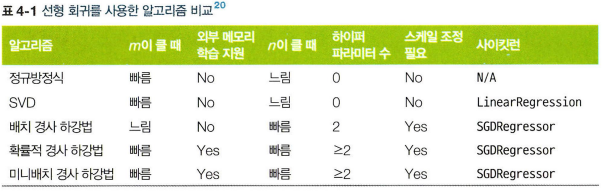

---

## **4.3 다항 회귀**

  - 비선형 데이터를 학습하는 데도 선형 모델을 사용할 수 있다.
  
  - 다항 회귀 
    - 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

  - 사이킷런의 `PolynomialFeatures`를 사용해 훈련 데이터를 변환해보자. 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한다.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.45027583])

In [19]:
X_poly[0]

array([1.45027583, 2.10329998])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87876177]), array([[1.14371499, 0.54697275]]))

---

## **4.4 학습 곡선**

  - 어떻게 모델이 데이터에 과대적합 또는 과소적합되었는지 알 수 있을까?
    - 학습 곡선을 살펴본다. 이를 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.
    - 다음 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = '훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = '검증 세트')

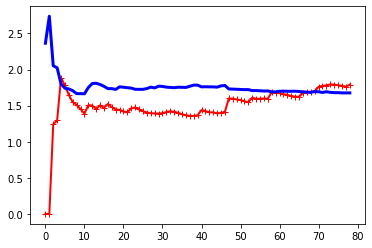

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

  - 위 학습 곡선은 과소적합 모델의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있기 때문이다.

  - 이제 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선을 그려보자.

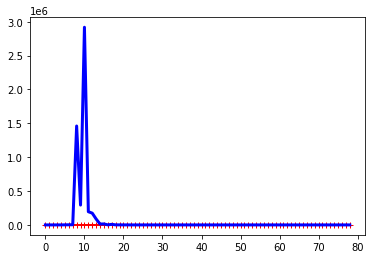

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

  - 위 학습 곡선은 이전과 비슷해 보이지만, 두 가지 매우 중요한 차이점을 갖는다.
    1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
    2. 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

---

## **4.5 규제가 있는 선형 모델**

  - 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다. 
  - 자유도를 줄이면 데이터에 과대적합되기 더 어려워지므로, 다항 회귀 모델을 규제하는 간단한 방법은 **다항식의 차수를 감소**시키는 것이다.
  - **선형 회귀 모델**에서는 보통 **모델의 가중치를 제한**함으로써 규제를 가한다.

### 4.5.1 릿지 회귀

  - 릿지 회귀
    - 규제가 추가된 선형 회귀 버전
  
  - 규제항 $αΣ_{i=1}^{n}θ_{i}^2$이 비용 함수에 추가된다.
    - 하이퍼 파라미터 α는 모델을 얼마나 많이 규제할지 조절한다. 
    - α=0이면 릿지 회귀는 선형 회귀와 같다.
    - α가 아주 크면, 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.

  - 릿지 회귀의 비용 함수
$$J(θ) = MSE(θ)+α\frac{1}{2}Σ_{i=1}^{n}θ_{i}^2$$

  - 다양한 수준의 릿지 규제를 사용한 선형 회귀와 다항 회귀
  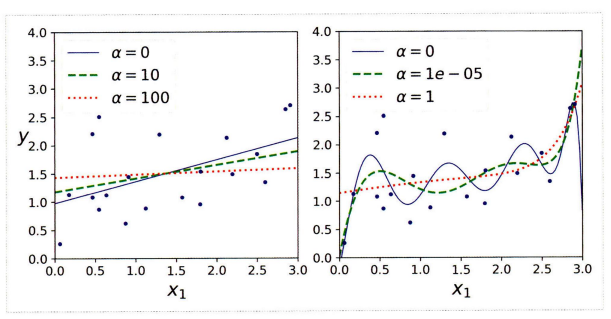

  - 릿지 회귀의 정규방정식
$$θ = (X^TX + αA)^{-1}X^Ty$$

  - 다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예이다.

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.93594806]])

  - 다음은 확률적 경사 하강법을 사용한 경우이다.
  - penalty 매개변수는 사용할 규제를 지정한다. `릿지 회귀`의 경우, `l2`를 이용한다.

In [25]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.91036091])

### 4.5.2 라쏘 회귀

  - 라쏘 회귀
    - 선형 회귀의 또 다른 규제된 버전
  
  - 라쏘 회귀의 비용 함수
$$J(θ) = MSE(θ)+αΣ_{i=1}^{n}|θ_{i}|$$

  - 다양한 수준의 라쏘 규제를 사용한 선형 회귀와 다항 회귀
  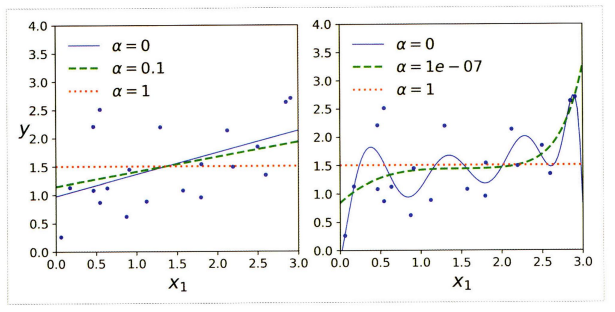

  - 라쏘 회귀의 중요한 특징
    - 덜 중요한 특성의 가중치를 제거한다. 즉, 가중치가 0이 된다.
    - 라쏘 회귀는 자동적으로 특성 선택을 하고 희소 모델을 만든다.

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.87710544])

  - 위의 코드에서 Lasso 대신 SGDRegressor(penalty = 'l1')을 사용할 수도 있다.

### 4.5.3 엘라스틱넷

  - 엘라스틱넷
    - 릿지 회귀와 라쏘 회귀를 절충한 모델
    - 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다.
      - r = 0 : 릿지 회귀와 동일
      - r = 1 : 라쏘 회귀와 동일

  - 엘라스틱넷 비용 함수
$$J(θ) = MSE(θ) + rαΣ_{i=1}^{n}|θ_{i}| + \frac{1-r}{2}αΣ_{i=1}^{n}θ_{i}^2$$

  - 보통의 선형 회귀, 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 할까?
    - 일반적으로 평범한 선형 회귀는 피하는 것이 좋다.
    - 릿지가 기본이 되나, 사용되는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.
    - 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있는 경우, 라쏘보다는 엘라스틱넷을 선호한다.

In [27]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.87909758])

### 4.5.4 조기 종료

  - 반복적인 학습 알고리즘을 규제하는 방법은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다.
  - 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것이다.

In [28]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
  ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                       penalty = None, learning_rate = 'constant', eta0 = 0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)     # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

NameError: ignored

---

## **4.6 로지스틱 회귀**

  - 로지스틱 회귀
    - 샘플이 특정 클래스에 속할 확률을 추정하는 데 활용되는 알고리즘

### 4.6.1 확률 추정

  - 로지스틱 회귀 모델의 확률 추정 (벡터 표현식)
$$ p = h_{θ}(x) = σ(θ^Tx)$$
    - 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수이다.

### 4.6.2 훈련과 비용 함수

  - 로지스틱 회귀와 비용 함수 (로그 손실)
$$J(θ) = -\frac{1}{m}Σ_{i=1}^m[y^{(i)}log(p^{(i)}) + (1 - y^{(i)})log(1 - p^{(i)})]$$

  - 로지스틱 비용 함수의 편도함수
$$\frac{∂}{∂θ_{j}}J(θ) = \frac{1}{m}Σ_{i=1}^m (σ(θ^Tx^{(i)}) - y^{(i)})x_{j}^{(i)}$$

### 4.6.3 결정 경계

In [29]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [30]:
X = iris['data'][:, 3:]     # 꽃잎의 너비
y = (iris['target'] == 2).astype(np.int)      # 1 Iris-Virginica면 1, 그렇지 않으면 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

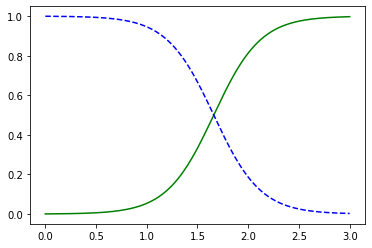

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

In [33]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀

In [34]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5, 2]])

array([2])

In [36]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

---